In [1]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

In [3]:
%%time
import gc

with open("dataset/R6/subsample/data_04_05.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 8.12 s, sys: 3.73 s, total: 11.9 s
Wall time: 44.7 s


In [4]:
NUM_OF_TRIALS = None

In [5]:
p_random = algorithms.RandomPolicy()
ctr_random = evaluation.evaluate(p_random, data, stop_after=NUM_OF_TRIALS)

Random policy with ZeroCosts
Average reward: 0.0401
Execution time: 41.4s


In [6]:
egreedy = algorithms.EpsilonGreedy(epsilon=0.2, total_n_arms=data.n_arms)
ctr_egreedy = evaluation.evaluate(egreedy, data, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.2) with ZeroCosts
Average reward: 0.0601
Execution time: 55.0s


In [7]:
linucb = algorithms.LinUCB(
    context_dimension=len(data.events[0].user_features),
    n_arms=data.n_arms,
    alpha=0.3,
)
ctr_linucb = evaluation.evaluate(linucb, data, stop_after=NUM_OF_TRIALS)

LinUCB (alpha=0.3 with ZeroCosts
Average reward: 0.0731
Execution time: 4.2m


In [8]:
ps_linucb = algorithms.PSLinUCB(
    context_dimension=len(data.events[0].user_features),
    n_arms=data.n_arms,
    alpha=0.25,
    omega=6000,
    delta=0.04
)
ctr_pslinucb = evaluation.evaluate(ps_linucb, data, stop_after=NUM_OF_TRIALS)
change_points = ps_linucb.change_points

PSLinUCB (alpha=0.25, omega=6000, delta=0.04) with ZeroCosts
Average reward: 0.0726
Execution time: 36.4m


In [9]:
def plot_ctrs(ctr_dict, change_points=()):
    fig, ax = plt.subplots(1,1, figsize=(16, 8));
    
    N = 40
    
    max_vline=0
    
    for label, ctr in ctr_dict.items():
        ax.plot(ctr[N:], label=label)
        max_vline=max(max_vline, max(ctr[N:]))
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('Evaluation without costs')
    
    ax.vlines(change_points, 0, max_vline, label='change points', color='pink')

    plt.legend();
    plt.show();

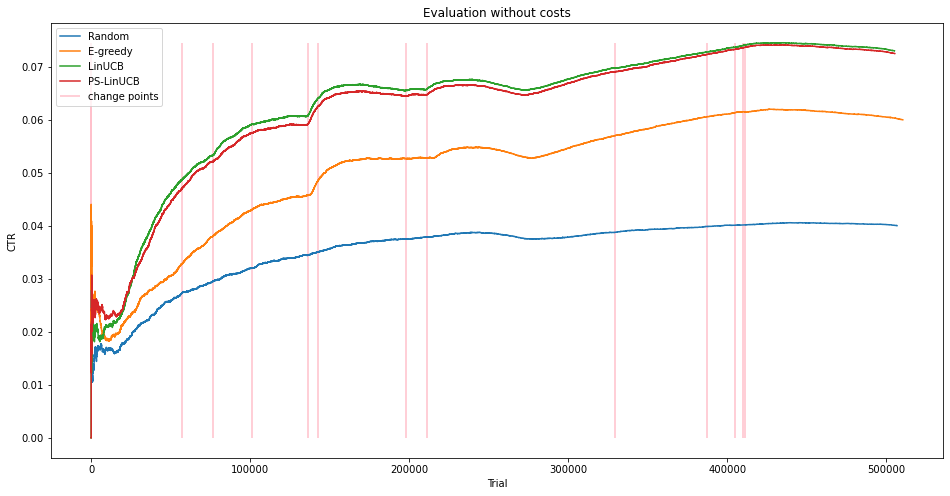

In [10]:
plot_ctrs(
    {
        'Random': ctr_random,
        'E-greedy': ctr_egreedy,
        'LinUCB': ctr_linucb,
        'PS-LinUCB': ctr_pslinucb,
    },
    change_points=change_points,
)
